# Predicting DJIA Movement with BERT

In this notebook, I have tried to perform NLP on daily financial news using BERT. Few things to note:<br>
1. Due to computational restriction, I couldnot combine all the news columns while working with BERT. 
2. Also, BERT can process only 512 tokens at a time, so even if the kernel was computationally strong, I couldnot have used all news articles column. If I combined all news articles, final number of tokens generated was 618. Hence the code was breaking. 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stocknews/RedditNews.csv
/kaggle/input/stocknews/upload_DJIA_table.csv
/kaggle/input/stocknews/Combined_News_DJIA.csv


# Reading CSV file

In this csv file, Top1 to Top25 are the news articles in decreasing order of their priority.<br>

Label "1" is when DJIA Adj Close value rose or stayed as the same.<br>
Label "0" is when DJIA Adj Close value decreased.
                                                                                             

In [2]:
import pandas as pd
 
# Here we are interested in Combined_News_DJIA.csv file
df = pd.read_csv('/kaggle/input/stocknews/Combined_News_DJIA.csv')

In [3]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [4]:
df.tail()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
1986,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
1988,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Label,1989.0,0.535445,0.498867,0.0,0.0,1.0,1.0,1.0


# Observation

Here, after looking at the data, I feel we donot require date column and we can combine all the top 25 news into one single column. Hence, we can drop date column and merge the headline columns together. Also, since I would be using BERT for final classification and BERT allows only 512 tokens at a time, hence I would be taking combination of top 10 news only. 

In [7]:
df = df.drop(['Date'], axis=1)
df.head()

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the

In [8]:
df_columns = df.columns
print(df_columns)

Index(['Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8',
       'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16',
       'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24',
       'Top25'],
      dtype='object')


In [9]:
columns = ['Top1']

In [10]:
df['combined_news'] = df[columns].apply(lambda row:'.'.join(row.values.astype(str)), axis=1)

In [11]:
df = df.drop(columns, axis=1)

In [12]:
df.head()

,Label,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined_news
0,0,b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou..."
1,1,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...
2,0,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'Remember that adorable 9-year-old who sang a...
3,0,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...","b""92% of CNN readers: Russia's actions in Geor...",...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,b' U.S. refuses Israel weapons to attack Iran:...
4,1,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in So

In [13]:
columns_2 = ['Top2','Top3', 'Top4', 'Top5','Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23','Top24', 'Top25']
df = df.drop(columns_2, axis=1)

In [14]:
df.head()

,Label,combined_news
0,0,"b""Georgia 'downs two Russian warplanes' as cou..."
1,1,b'Why wont America and Nato help us? If they w...
2,0,b'Remember that adorable 9-year-old who sang a...
3,0,b' U.S. refuses Israel weapons to attack Iran:...
4,1,b'All the experts admit that we should legalis...


As we can clearly see, there are many html tags which should be removed to avoid any biases. 

In [15]:
df = df.replace('b\"|b\'|\\\\|\\\"', '', regex=True)
df.head(2)

,Label,combined_news
0,0,Georgia 'downs two Russian warplanes' as count...
1,1,Why wont America and Nato help us? If they won...


# EDA on final dataframe

## Counting Labels

Here, I am visualizing the number of times DJIA remanined the same/went up and number of times it went down.

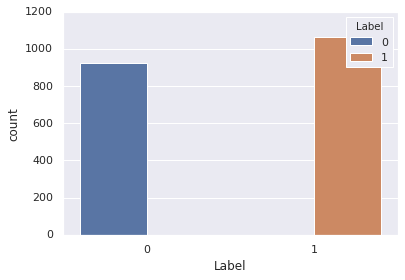

In [16]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

ax = sns.countplot(x='Label', hue='Label', data=df)

Now, lets visualize the most common terms that occur when DJIA remains the same or goes up.

In [17]:
from collections import Counter

# Copy df enteries in 2 separate lists based on labels

data_djia_up = df[df['Label']==1].copy()
data_djia_down = df[df['Label']==0].copy()

In [18]:
print(data_djia_up[:2])

   Label                                      combined_news
1      1  Why wont America and Nato help us? If they won...
4      1  All the experts admit that we should legalise ...


In [19]:
print(data_djia_down[:2])

   Label                                      combined_news
0      0  Georgia 'downs two Russian warplanes' as count...
2      0  Remember that adorable 9-year-old who sang at ...


# Data pre-processing

Now that we have separated the contents of dataframe based on their labels, we need to pre-process the `combined_news` coloumn. This will involve the following steps -<br>
1. Punctuation removal
2. Stopwords removal

## Punctuations

In [20]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


## Stopwords
Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text, and which may be removed to avoid them being construed as signal for prediction.

In [21]:
from nltk.corpus import stopwords
print(stopwords.words('english')[10:15])

["you've", "you'll", "you'd", 'your', 'yours']


In [22]:
def punctuation_stopwords_removal(news_article):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in news_article if ch not in string.punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_news_article = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_news_article

In [23]:
data_djia_up.loc[:, 'combined_news'] = data_djia_up['combined_news'].apply(punctuation_stopwords_removal)
print(data_djia_up[:1])

   Label                                      combined_news
1      1  [wont, america, nato, help, us, wont, help, us...


In [24]:
words_djia_up = data_djia_up['combined_news'].tolist()

In [25]:
words_djia_up[:3]

[['wont',
  'america',
  'nato',
  'help',
  'us',
  'wont',
  'help',
  'us',
  'help',
  'iraq'],
 ['experts', 'admit', 'legalise', 'drugs'],
 ['mom',
  'missing',
  'gay',
  'man',
  'bad',
  'hes',
  '21yearold',
  'cheerleader',
  'theyd',
  'still',
  'looking']]

In [26]:
data_djia_down.loc[:, 'combined_news'] = data_djia_down['combined_news'].apply(punctuation_stopwords_removal)
words_djia_down = data_djia_down['combined_news'].tolist()
print(words_djia_down[:2])

[['georgia', 'downs', 'two', 'russian', 'warplanes', 'countries', 'move', 'brink', 'war'], ['remember', 'adorable', '9yearold', 'sang', 'opening', 'ceremonies', 'fake']]


In [27]:
djia_up_list = []
for sublist in words_djia_up:
    for words in sublist:
        djia_up_list.append(words)

djia_down_list = []
for sublist in words_djia_down:
    for words in sublist:
        djia_down_list.append(words)
        

In [28]:
print('DJIA up list : {}'.format(len(djia_up_list)))
print('DJIA down list : {}'.format(len(djia_down_list)))

DJIA up list : 13443
DJIA down list : 11955


In [29]:
djia_up_counter = Counter(djia_up_list)
djia_down_counter = Counter(djia_down_list)

djia_up_top_30_words = pd.DataFrame(djia_up_counter.most_common(30), columns=['word', 'count'])
djia_down_top_30_words = pd.DataFrame(djia_down_counter.most_common(30), columns=['word', 'count'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

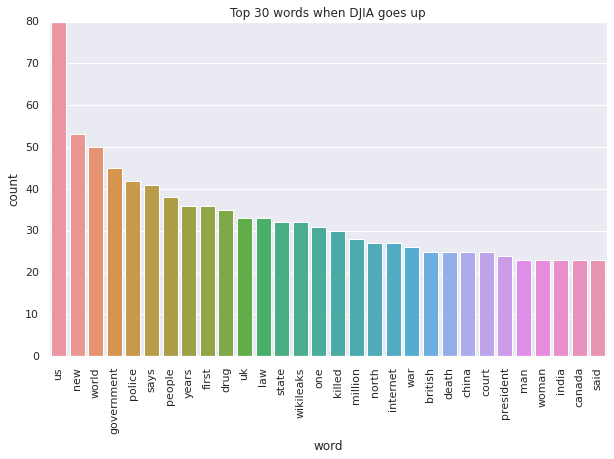

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=djia_up_top_30_words, ax=ax)
plt.title('Top 30 words when DJIA goes up')
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

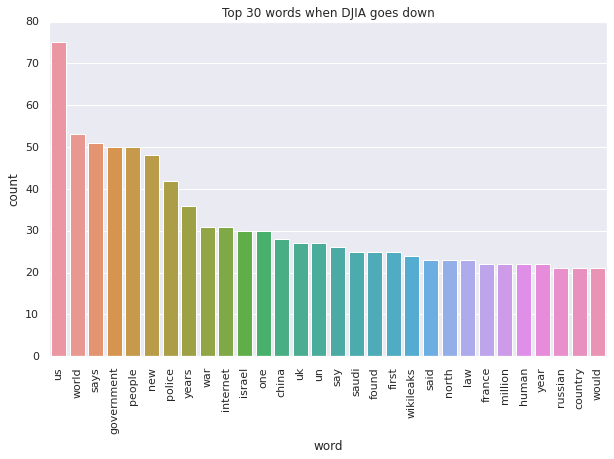

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=djia_down_top_30_words, ax=ax)
plt.title('Top 30 words when DJIA goes down')
plt.xticks(rotation='vertical')

# Using DistilBERT for DJIA movement prediction

Here, we would be using DistilBert for predicting the movement of DJIA. <br>
You can also view Jalammar's notebook on [using BERT for the first time](https://github.com/jalammar/jalammar.github.io/blob/master/notebooks/bert/A_Visual_Notebook_to_Using_BERT_for_the_First_Time.ipynb)<br>
Let's have a look at our pre-processed dataset :

In [32]:
df.head()

,Label,combined_news
0,0,Georgia 'downs two Russian warplanes' as count...
1,1,Why wont America and Nato help us? If they won...
2,0,Remember that adorable 9-year-old who sang at ...
3,0,U.S. refuses Israel weapons to attack Iran: r...
4,1,All the experts admit that we should legalise ...


In [33]:
!pip install transformers

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


## Load pre-trained DistilBERT model


In [35]:
# For DistilBERT
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# load pre-trained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

## Model 1 : Preparing dataset
Before we can hand our sentences to BERT, we need to so some minimal processing to put them in the format it requires.
### Tokenization
Our first step is to tokenize the sentences -- break them up into word and subwords in the format BERT is comfortable with

In [36]:
tokenized = df['combined_news'].apply((lambda x: tokenizer.encode(x, add_special_token=True)))

In [37]:
print(tokenized.shape)

(1989,)


In [38]:
tokenized[:1]

0    [101, 4108, 1005, 12482, 2048, 2845, 24136, 20...
Name: combined_news, dtype: object

### Padding
After tokenization, tokenized is a list of sentences -- each sentences is represented as a list of tokens. We want BERT to process our examples all at once (as one batch). It's just faster that way. For that reason, we need to pad all lists to the same size, so we can represent the input as one 2-d array, rather than a list of lists (of different lengths)

In [39]:
max_len = 0
for i in tokenized.values:
    if len(i)>max_len:
        max_len = len(i)
print(max_len)
padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

78


One thing to note is that BERT model takes only 512 tokens at a time. So in this case, max length exceeded 512 (628 to be exact.) For this purpose, I will be taking top 10 news only. Due to compuational capacity restriction, I cannot use more than one column for training the model. Hence, I will be taking only top1 news into account. 

In [40]:
np.array(padded).shape

(1989, 78)

### Masking
If we directly send padded to BERT, that would slightly confuse it. We need to create another variable to tell it to ignore (mask) the padding we've added when it's processing its input. That's what attention_mask is:

In [41]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(1989, 78)

## Model #1: And Now, Deep Learning!
Now that we have our model and inputs ready, let's run our model!<br>
The `model()` function runs our sentences through BERT. The results of the processing will be returned into last_hidden_states.

In [42]:
input_ids = torch.tensor(padded)
attention_mask = torch.tensor(attention_mask)
with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [43]:
features = last_hidden_states[0][:, 0, :].numpy()
labels = df['Label']

In [44]:
print(features[:10])

[[-0.36086106 -0.16207744 -0.2084857  ... -0.30507     0.34105778
   0.08085383]
 [ 0.30954662  0.20850469 -0.29937974 ...  0.1224136   0.4723484
   0.26783004]
 [ 0.29998276  0.04621707 -0.04180933 ...  0.08885639  0.3317783
   0.3698523 ]
 ...
 [-0.19172376 -0.41772428  0.05932816 ... -0.45935822  0.3520215
   0.02621031]
 [ 0.2486663  -0.02985957 -0.1605662  ...  0.04126985  0.18912628
   0.28713652]
 [-0.37453964 -0.14715368 -0.26433668 ... -0.48020387  0.17097425
   0.1307473 ]]


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [46]:
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)

LogisticRegression()

In [47]:
lr_clf.score(test_features, test_labels)

0.4759036144578313

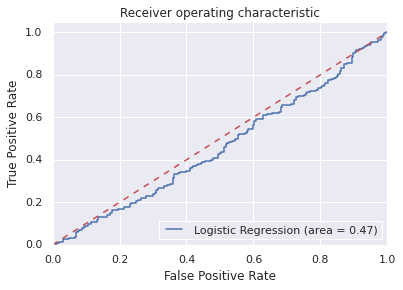

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(test_labels, lr_clf.predict(test_features))
fpr, tpr, thresholds = roc_curve(test_labels, lr_clf.predict_proba(test_features)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# TFIDF (optional)

This part of kernel is optional. I wanted to explore how tf-idf would work on predicting the movement of DJIA.

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
df = pd.read_csv('/kaggle/input/stocknews/Combined_News_DJIA.csv')

In [51]:
columns = ['Top1', 'Top2','Top3', 'Top4', 'Top5','Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23','Top24', 'Top25']
df['combined_news'] = df[columns].apply(lambda row:'.'.join(row.values.astype(str)), axis=1)

In [52]:
df = df.drop(columns, axis=1)

In [53]:
from bs4 import BeautifulSoup

df= df.replace('b\"|b\'|\\\\|\\\"', '', regex=True)
df.head()

,Date,Label,combined_news
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...
1,2008-08-11,1,Why wont America and Nato help us? If they won...
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...
4,2008-08-14,1,All the experts admit that we should legalise ...


In [54]:
bow_transformer = CountVectorizer(analyzer=punctuation_stopwords_removal).fit(df['combined_news'])

In [55]:
len(bow_transformer.vocabulary_)

79203

In [56]:
sample_djia_down = df['combined_news'][0]
bow_sample_djia_down = bow_transformer.transform([sample_djia_down])
print(sample_djia_down)
print('=====')
print(bow_sample_djia_down)

Georgia 'downs two Russian warplanes' as countries move to brink of war.BREAKING: Musharraf to be impeached.'.Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)'.Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire'.Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing.150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.'.Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side.The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it..Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]'.Did the U.S. Prep Georgia for War with Russia?'.Rice Gives Green Light for Israel to Attack

In [57]:
print('Printing bag-of-words for sample 1 (DJIA goes down) :')
row, cols = bow_sample_djia_down.nonzero()
for col in cols:
    print(bow_transformer.get_feature_names()[col])

Printing bag-of-words for sample 1 (DJIA goes down) :
1000
12
5
absorb
act
action
affairsdid
american
amp
anyway
approved
artillery
attack
attacking
backlashcondoleezza
bad
banned
barak
behalf
breakaway
brink
bush
busy
capital
case
ceremonies
children
columns
combatent
completely
countries
crisis
day
decline
defense
destroyed
disgrace
downs
ehud
enemy
entered
european
faces
fbisorussia
feel
fight
fighting
fireafghan
footage
forces
fucking
full
georgia
georgian
georgias
gets
gives
green
haman
help
hostilitiesthis
hundred
idea
iii
illnesses
impeachedrussia
impunity
intervene
invades
involved
iran
iraq
islamist
israel
israeli
itgeorgian
jetsbreaking
journalismchina
kept
kidnapping
killed
lawsuit
leaving
light
like
longer
manufactory
mental
mexicos
military
minister
move
moving
musharraf
nato
new
news
nothing
nothing150
nuclear
nyts
official
old
olympics
olympicsno
opening
opsannouncingclass
osettain
ossetia
ossetiaindian
ossetiawhy
pentagon
people
prep
prepared
presumably
prevent
programm

In [58]:
print(np.shape(bow_sample_djia_down))

(1, 79203)


In [59]:
print('Printing bag-of-words for sample 2 (DJIA goes up/remains the same :)')
sample_djia_up = df['combined_news'][1]
bow_sample_djia_up = bow_transformer.transform([sample_djia_up])
print(sample_djia_up)
print('======')
print(bow_sample_djia_up)

Printing bag-of-words for sample 2 (DJIA goes up/remains the same :)
Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'.Bush puts foot down on Georgian conflict'.Jewish Georgian minister: Thanks to Israeli training, we're fending off Russia .Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired'.Olympic opening ceremony fireworks 'faked'.What were the Mossad with fraudulent New Zealand Passports doing in Iraq?'.Russia angered by Israeli military sale to Georgia'.An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people'.Welcome To World War IV! Now In High Definition!'.Georgia's move, a mistake of monumental proportions .Russia presses deeper into Georgia; U.S. says regime change is goal'.Abhinav Bindra wins first ever Individual Olympic Gold Medal for India'. U.S. ship heads for Arctic to define territory'.Drivers in a Jerusalem taxi station threate

In [60]:
from sklearn.feature_extraction.text import TfidfTransformer

bow_data = bow_transformer.transform(df['combined_news'])
print(bow_data[:1])
tfidf_transformer = TfidfTransformer().fit(bow_data)

  (0, 53)	1
  (0, 280)	1
  (0, 2388)	1
  (0, 3454)	1
  (0, 3801)	1
  (0, 3825)	1
  (0, 4236)	1
  (0, 5755)	1
  (0, 5863)	1
  (0, 6543)	1
  (0, 6751)	1
  (0, 7285)	1
  (0, 7757)	1
  (0, 7835)	1
  (0, 8576)	1
  (0, 8623)	1
  (0, 9046)	1
  (0, 9094)	1
  (0, 9672)	1
  (0, 11628)	1
  (0, 11775)	1
  (0, 12311)	1
  (0, 12394)	1
  (0, 13050)	2
  (0, 13388)	1
  :	:
  (0, 71906)	1
  (0, 72044)	2
  (0, 72589)	2
  (0, 72970)	1
  (0, 73067)	1
  (0, 73370)	1
  (0, 73516)	1
  (0, 73978)	4
  (0, 74716)	1
  (0, 74816)	1
  (0, 74865)	1
  (0, 75697)	3
  (0, 75706)	1
  (0, 75719)	1
  (0, 75858)	1
  (0, 75958)	1
  (0, 76921)	1
  (0, 77351)	1
  (0, 77708)	1
  (0, 77714)	2
  (0, 77977)	2
  (0, 78299)	1
  (0, 78397)	1
  (0, 78740)	1
  (0, 78879)	1


In [61]:
final_tfidf = tfidf_transformer.transform(bow_data)
print(final_tfidf)

  (0, 78879)	0.08992988241047055
  (0, 78740)	0.0440219238356948
  (0, 78397)	0.0206391174376636
  (0, 78299)	0.02523380293229986
  (0, 77977)	0.04847120580388957
  (0, 77714)	0.038810753861782794
  (0, 77708)	0.08992988241047055
  (0, 77351)	0.053764968941441754
  (0, 76921)	0.0756739676993348
  (0, 75958)	0.0555587199071744
  (0, 75858)	0.040064265740091545
  (0, 75719)	0.08992988241047055
  (0, 75706)	0.08992988241047055
  (0, 75697)	0.06157076318476815
  (0, 74865)	0.08992988241047055
  (0, 74816)	0.047951988586972076
  (0, 74716)	0.06557683121864555
  (0, 73978)	0.05712795928743642
  (0, 73516)	0.07281411540057674
  (0, 73370)	0.03659664027396496
  (0, 73067)	0.08531586032896392
  (0, 72970)	0.025080281836451345
  (0, 72589)	0.046408460721043036
  (0, 72044)	0.05956080909074401
  (0, 71906)	0.05703866970681566
  :	:
  (1988, 5636)	0.08791748270130299
  (1988, 4860)	0.03916773041098513
  (1988, 4460)	0.03489117605344331
  (1988, 3986)	0.06074653580674998
  (1988, 3880)	0.0360896359

In [62]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(final_tfidf, df['Label'], test_size=0.3, random_state=5)

In [63]:
features_train = features_train.A
features_test = features_test.A

In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

djia_movement_detect_model_MNB = MultinomialNB()
djia_movement_detect_model_MNB.fit(features_train, np.asarray(labels_train, dtype="float64"))
pred_test_MNB = djia_movement_detect_model_MNB.predict(features_test)

acc_MNB = accuracy_score(np.asarray(labels_test, dtype="float64"), pred_test_MNB)
print(acc_MNB)

0.5293132328308208


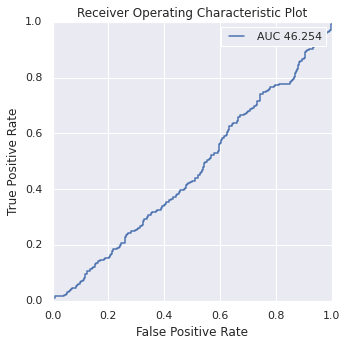

In [65]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thr = roc_curve(np.asarray(labels_test, dtype="float64"), djia_movement_detect_model_MNB.predict_proba(features_test)[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot')
auc_knn4 = auc(fpr, tpr) * 100
plt.legend(["AUC {0:.3f}".format(auc_knn4)]);